In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\izaka\anaconda_projects\Portfolio Projects\2 SAP\raw_sales_logistics_data.csv')
df

,Order ID,Product,Customer Region,Order Date,Ship Date,Delivery Status,Revenue (€),Inventory Level,Warehouse,Shipping Method
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORD1000,Sensor B,Berlin,15/03/2025,2025-03-23,Late,€1570.4,116.0,Leipzig,Express
2,ORD1001,Sensor C,MUNICH,08/03/2025,2025-03-12,Delivered,€700.73,-3.0,Leipzig,Express
3,ORD1002,Sensor A,MUNICH,06/04/2025,2025-04-13,Delivered,€1880.18,NaN,Poznan,Economy
4,ORD1003,Sensor B,Warsaw,14/06/2025,2025-06-20,Delivered,€63.78,NaN,Poznan,Express
...,...,...,...,...,...,...,...,...,...,...
254,ORD1245,Sensor B,berlin,27/06/2025,2025-07-02,Delivered,€1885.41,91.0,Munich,Economy
255,ORD1246,Sensor C,MUNICH,27/06/2025,2025-06-29,Cancelled,€1657.8,97.0,Munich,Standard
256,ORD1247,module x,Warsaw,04/06/2025,2025-06-07,NaN,€1401.73,100.0,Leipzig,Standard
257,ORD1248,Sensor C,Krakow,24/02/2025,2025-03-04,Delivered,€292.23,3.0,Poznan,Economy


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         258 non-null    object 
 1   Product          258 non-null    object 
 2   Customer Region  258 non-null    object 
 3   Order Date       258 non-null    object 
 4   Ship Date        258 non-null    object 
 5   Delivery Status  249 non-null    object 
 6   Revenue (€)      244 non-null    object 
 7   Inventory Level  247 non-null    float64
 8   Warehouse        258 non-null    object 
 9   Shipping Method  258 non-null    object 
dtypes: float64(1), object(9)
memory usage: 20.4+ KB


In [3]:
df.duplicated().sum()

8

In [4]:
df_cleaned = df.drop_duplicates()

In [5]:
# Replace empty strings with NaN

df_cleaned = df_cleaned.replace('', np.nan)

In [6]:
df_cleaned.isna().sum()

Order ID            1
Product             1
Customer Region     1
Order Date          1
Ship Date           1
Delivery Status    10
Revenue (€)        14
Inventory Level    12
Warehouse           1
Shipping Method     1
dtype: int64

In [7]:
df_cleaned = df_cleaned.iloc[1:].reset_index(drop=True)

For now I will keep NaN values, and investigate them later.

In [8]:
df_cleaned = df_cleaned.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
df_cleaned['Product'].value_counts(dropna=False)

Product
Sensor A    56
Sensor C    54
Sensor B    52
MODULE Y    47
module x    41
Name: count, dtype: int64

In [10]:
# Correct typos and style

df_cleaned['Product'] = df_cleaned['Product'].replace({
    'module x': 'Module X',
    'MODULE Y': 'Module Y'
})

In [11]:
df_cleaned['Product'].value_counts(dropna=False)

Product
Sensor A    56
Sensor C    54
Sensor B    52
Module Y    47
Module X    41
Name: count, dtype: int64

In [12]:
df_cleaned['Customer Region'].value_counts(dropna=False)

Customer Region
berlin    56
Berlin    54
Warsaw    51
Krakow    50
MUNICH    39
Name: count, dtype: int64

In [13]:
df_cleaned['Customer Region'] = df_cleaned['Customer Region'].replace({
    'berlin': 'Berlin',
    'MUNICH': 'Munich'
})

In [14]:
df_cleaned.isna().sum()

Order ID            0
Product             0
Customer Region     0
Order Date          0
Ship Date           0
Delivery Status     9
Revenue (€)        13
Inventory Level    11
Warehouse           0
Shipping Method     0
dtype: int64

In [15]:
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'])

In [16]:
df_cleaned['Order Date'] = pd.to_datetime(
    df_cleaned['Order Date'].str.strip(),   # remove leading/trailing spaces
    format='%d/%m/%Y',
    errors='coerce'
)

In [17]:
df_cleaned.dtypes

Order ID                   object
Product                    object
Customer Region            object
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Delivery Status            object
Revenue (€)                object
Inventory Level           float64
Warehouse                  object
Shipping Method            object
dtype: object

In [18]:
df_cleaned['Delivery Time (days)'] = (
    df_cleaned['Ship Date'] - df_cleaned['Order Date']
).dt.days

In [19]:
df_cleaned.head()

,Order ID,Product,Customer Region,Order Date,Ship Date,Delivery Status,Revenue (€),Inventory Level,Warehouse,Shipping Method,Delivery Time (days)
0,ORD1000,Sensor B,Berlin,2025-03-15,2025-03-23,Late,€1570.4,116.0,Leipzig,Express,8
1,ORD1001,Sensor C,Munich,2025-03-08,2025-03-12,Delivered,€700.73,-3.0,Leipzig,Express,4
2,ORD1002,Sensor A,Munich,2025-04-06,2025-04-13,Delivered,€1880.18,NaN,Poznan,Economy,7
3,ORD1003,Sensor B,Warsaw,2025-06-14,2025-06-20,Delivered,€63.78,NaN,Poznan,Express,6
4,ORD1004,Module Y,Berlin,2025-04-04,2025-04-15,Delivered,€503.9,56.0,Munich,Standard,11


In [20]:
# Remove euro signs and whitespace, convert to float, and round
df_cleaned['Revenue (€)'] = (
    df_cleaned['Revenue (€)']
    .str.replace('€', '', regex=False)  # remove €
    .str.strip()                        # remove leading/trailing spaces
    .astype(float)                      # convert to float
    .round(2)                           # round to 2 decimals
)

In [21]:
df_cleaned.dtypes

Order ID                        object
Product                         object
Customer Region                 object
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Delivery Status                 object
Revenue (€)                    float64
Inventory Level                float64
Warehouse                       object
Shipping Method                 object
Delivery Time (days)             int64
dtype: object

In [22]:
# checking for negative values

df_cleaned.describe()

,Order Date,Ship Date,Revenue (€),Inventory Level,Delivery Time (days)
count,250,250,237.000000,239.000000,250.000000
mean,2025-04-06 18:20:09.600000,2025-04-13 07:23:31.200000,1028.564852,56.456067,6.544000
min,2025-01-02 00:00:00,2025-01-08 00:00:00,50.460000,-5.000000,2.000000
25%,2025-02-18 06:00:00,2025-02-25 00:00:00,528.430000,24.500000,4.000000
50%,2025-04-02 00:00:00,2025-04-09 00:00:00,1008.610000,56.000000,7.000000
75%,2025-06-03 00:00:00,2025-06-09 00:00:00,1570.400000,90.500000,9.000000
max,2025-07-03 00:00:00,2025-07-14 00:00:00,1995.590000,118.000000,11.000000
std,NaN,NaN,590.486886,37.281537,2.931628


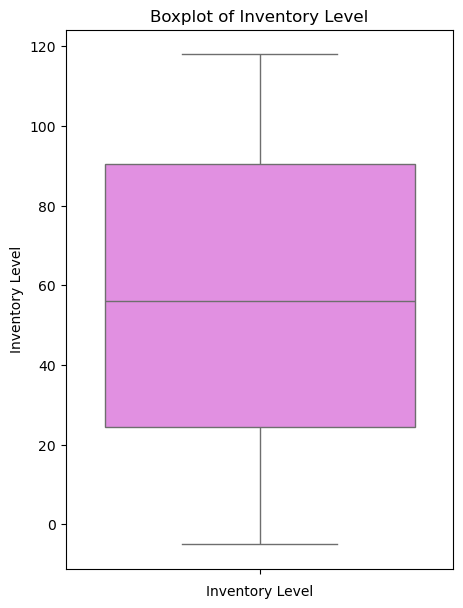

In [23]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df_cleaned['Inventory Level'], color='violet')
plt.title('Boxplot of Inventory Level')
plt.xlabel('Inventory Level')
plt.show()

In [24]:
df_cleaned.loc[df_cleaned['Inventory Level'] < 0, 'Inventory Level'] = np.nan

In [25]:
df_cleaned.isna().sum()

Order ID                 0
Product                  0
Customer Region          0
Order Date               0
Ship Date                0
Delivery Status          9
Revenue (€)             13
Inventory Level         22
Warehouse                0
Shipping Method          0
Delivery Time (days)     0
dtype: int64

In [26]:
# group orders by Customer Region and apply sum() function 
df_region = df_cleaned.groupby('Customer Region')['Revenue (€)'].sum()

In [27]:
df_region.head()

Customer Region
Berlin    112051.08
Krakow     46918.03
Munich     36787.51
Warsaw     48013.25
Name: Revenue (€), dtype: float64

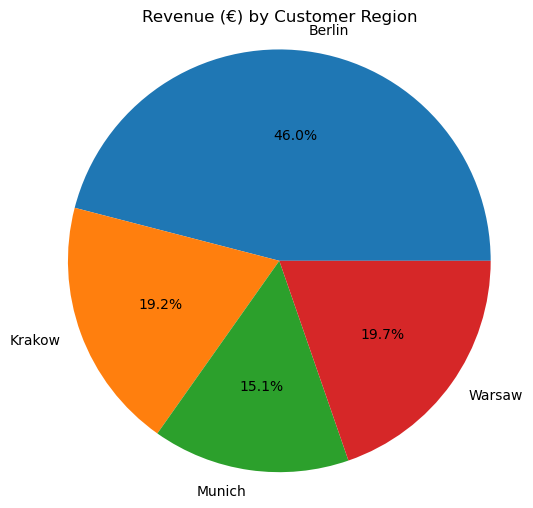

In [28]:
# autopct create %, start angle represent starting point
df_region.plot(kind='pie',
               figsize=(6, 6),
               autopct='%1.1f%%', # add in percentages   
)

plt.title('Revenue (€) by Customer Region')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')  # removes y-axis label


plt.show()

In [29]:
df_cleaned['Warehouse'].value_counts(dropna=False)

Warehouse
Leipzig    99
Poznan     81
Munich     70
Name: count, dtype: int64

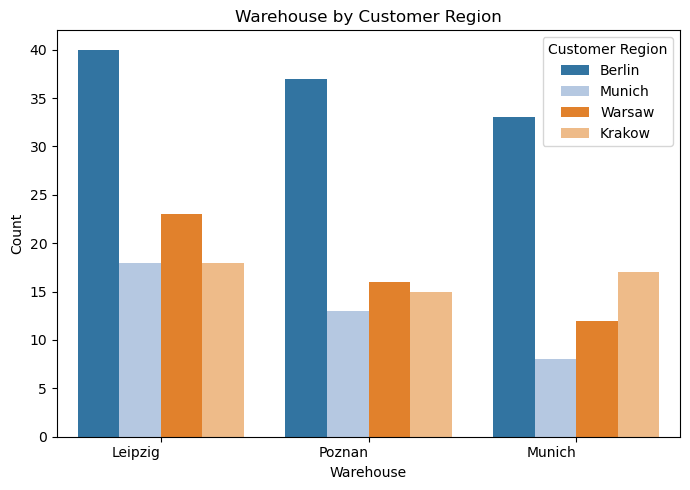

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='Warehouse', hue='Customer Region', palette='tab20')

plt.title('Warehouse by Customer Region')
plt.xlabel('Warehouse')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Customer Region')
plt.tight_layout()
plt.show()

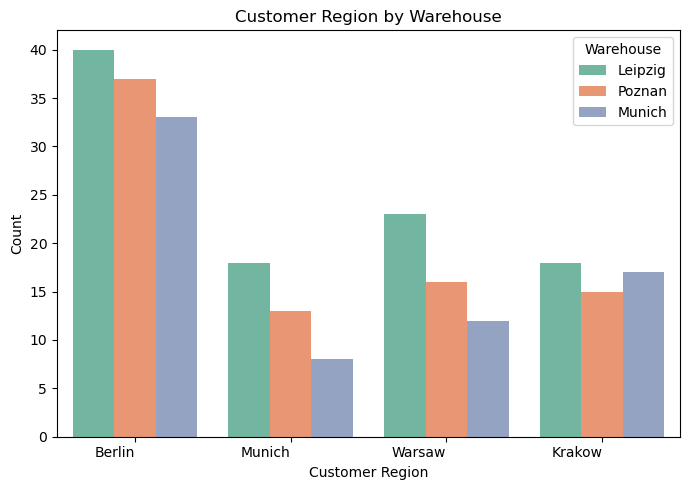

In [31]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='Customer Region', hue='Warehouse', palette='Set2')

plt.title('Customer Region by Warehouse')
plt.xlabel('Customer Region')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Warehouse')
plt.tight_layout()
plt.show()

In [32]:
df_cleaned['Delivery Status'].value_counts(dropna=False)

Delivery Status
Delivered    169
Late          43
Cancelled     29
NaN            9
Name: count, dtype: int64

In [33]:
df_cleaned['Delivery Status'] = df_cleaned['Delivery Status'].fillna('None')

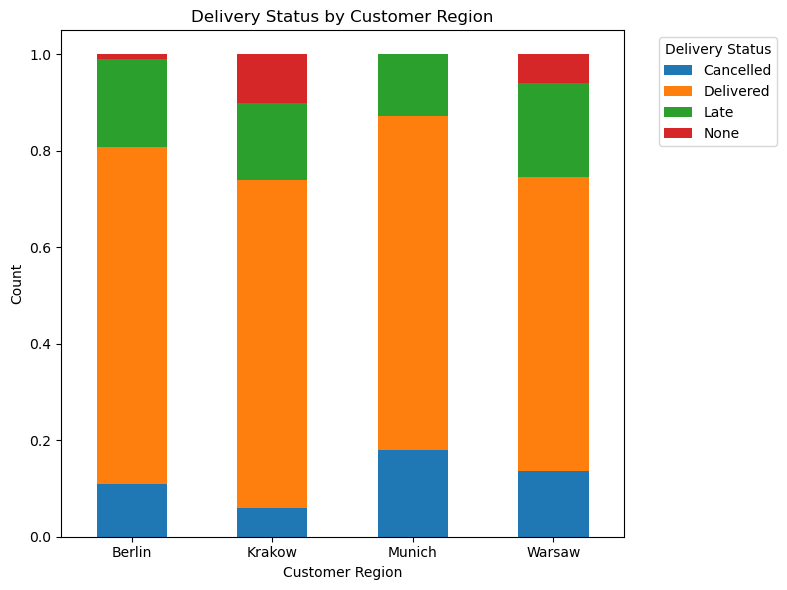

In [34]:
# Create a crosstab (counts of Delivery Status per Region)
ct = pd.crosstab(df_cleaned['Customer Region'], df_cleaned['Delivery Status'])

# Plot stacked bar chart
(ct.T / ct.sum(axis=1)).T.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('Delivery Status by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Count')
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

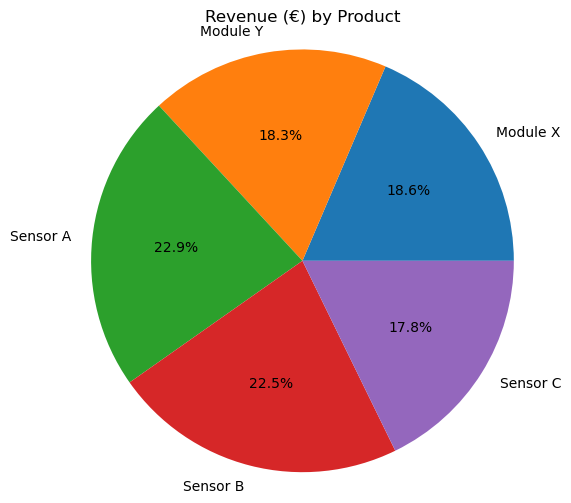

In [35]:
# group orders by Customer Region and apply sum() function 
df_product = df_cleaned.groupby('Product')['Revenue (€)'].sum()

# autopct create %, start angle represent starting point
df_product.plot(kind='pie',
               figsize=(6, 6),
               autopct='%1.1f%%', # add in percentages   
)

plt.title('Revenue (€) by Product')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')  # removes y-axis label


plt.show()

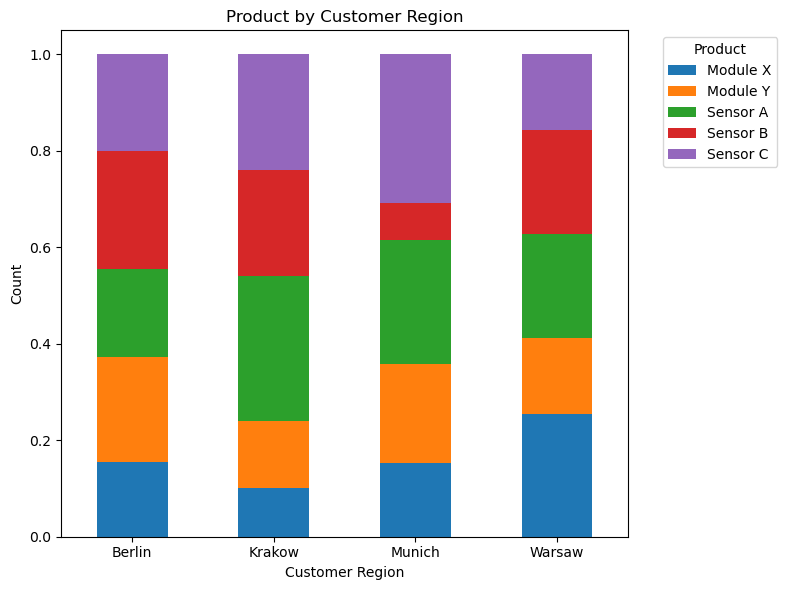

In [36]:
# Create a crosstab (counts of Delivery Status per Region)
ct = pd.crosstab(df_cleaned['Customer Region'], df_cleaned['Product'])

# Plot stacked bar chart
(ct.T / ct.sum(axis=1)).T.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('Product by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Count')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

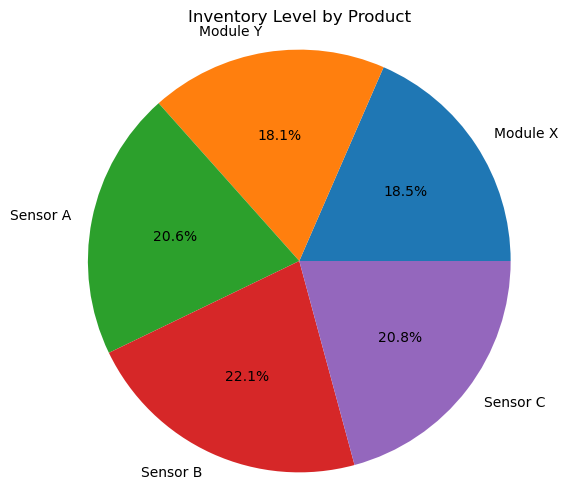

In [37]:
# group orders by Customer Region and apply sum() function 
df_inventory = df_cleaned.groupby('Product')['Inventory Level'].sum()

# autopct create %, start angle represent starting point
df_inventory.plot(kind='pie',
               figsize=(6, 6),
               autopct='%1.1f%%', # add in percentages   
)

plt.title('Inventory Level by Product')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')  # removes y-axis label


plt.show()

In [38]:
df_cleaned.isna().sum()

Order ID                 0
Product                  0
Customer Region          0
Order Date               0
Ship Date                0
Delivery Status          0
Revenue (€)             13
Inventory Level         22
Warehouse                0
Shipping Method          0
Delivery Time (days)     0
dtype: int64

In [39]:
df_cleaned.describe()

,Order Date,Ship Date,Revenue (€),Inventory Level,Delivery Time (days)
count,250,250,237.000000,228.000000,250.000000
mean,2025-04-06 18:20:09.600000,2025-04-13 07:23:31.200000,1028.564852,59.350877,6.544000
min,2025-01-02 00:00:00,2025-01-08 00:00:00,50.460000,0.000000,2.000000
25%,2025-02-18 06:00:00,2025-02-25 00:00:00,528.430000,27.000000,4.000000
50%,2025-04-02 00:00:00,2025-04-09 00:00:00,1008.610000,59.500000,7.000000
75%,2025-06-03 00:00:00,2025-06-09 00:00:00,1570.400000,92.000000,9.000000
max,2025-07-03 00:00:00,2025-07-14 00:00:00,1995.590000,118.000000,11.000000
std,NaN,NaN,590.486886,35.697575,2.931628


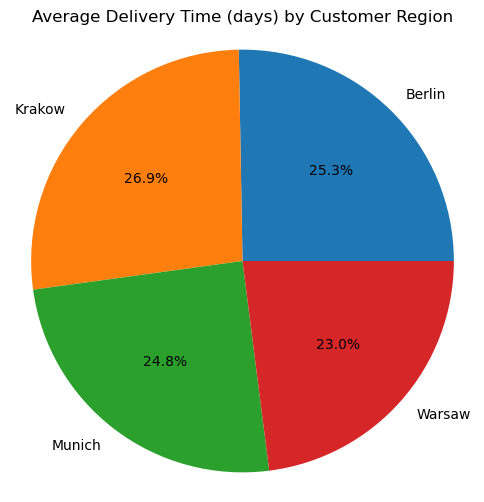

In [40]:
# group orders by Customer Region and apply sum() function 
df_product = df_cleaned.groupby('Customer Region')['Delivery Time (days)'].mean()

# autopct create %, start angle represent starting point
df_product.plot(kind='pie',
               figsize=(6, 6),
               autopct='%1.1f%%', # add in percentages   
)

plt.title('Average Delivery Time (days) by Customer Region')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')  # removes y-axis label


plt.show()

In [41]:
# group orders by Customer Region and apply sum() function 
df_product = df_cleaned.groupby('Customer Region')['Delivery Time (days)'].mean()
df_product

Customer Region
Berlin    6.600000
Krakow    7.020000
Munich    6.487179
Warsaw    6.000000
Name: Delivery Time (days), dtype: float64

Make a simple table here

In [42]:
df_product_max = df_cleaned.groupby('Customer Region')['Delivery Time (days)'].max()
df_product_max

Customer Region
Berlin    11
Krakow    11
Munich    11
Warsaw    11
Name: Delivery Time (days), dtype: int64

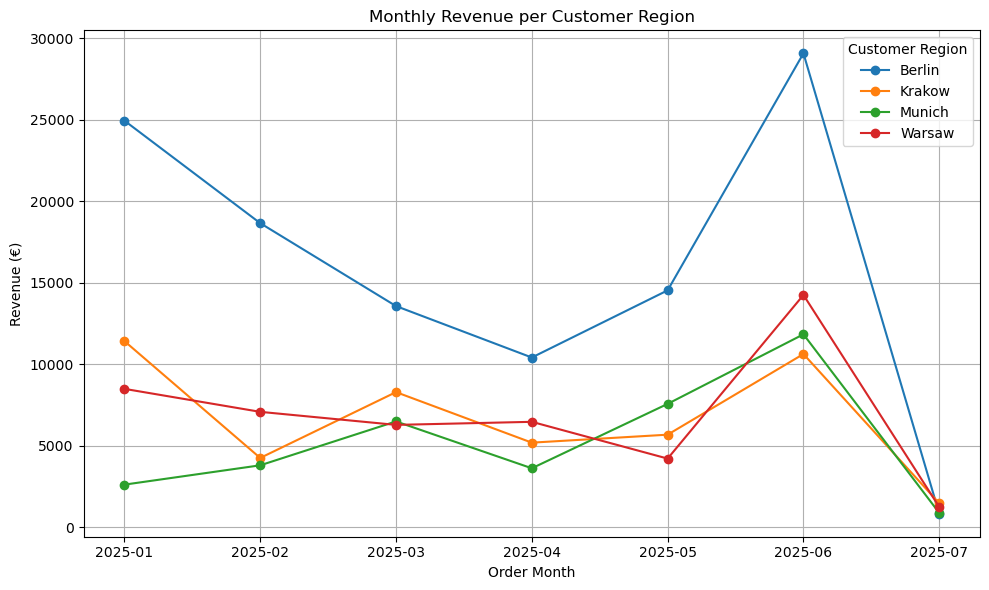

In [43]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.to_period('M').astype(str)

df_monthly = df_cleaned.groupby(['Order Month', 'Customer Region'])['Revenue (€)'].sum().reset_index()

df_pivot = df_monthly.pivot(index='Order Month', columns='Customer Region', values='Revenue (€)')

df_pivot.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Monthly Revenue per Customer Region')
plt.xlabel('Order Month')
plt.ylabel('Revenue (€)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Customer Region')
plt.show()

In [44]:
df_cleaned['Shipping Method'].value_counts(dropna=False)

Shipping Method
Economy     87
Standard    82
Express     81
Name: count, dtype: int64

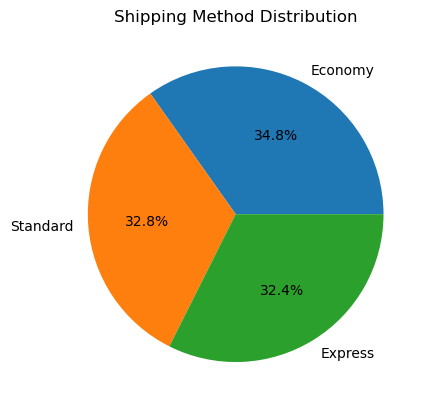

In [45]:
# Count occurrences of each shipping method
counts = df_cleaned['Shipping Method'].value_counts()

# Get labels and sizes
labels = counts.index
sizes = counts.values

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Shipping Method Distribution')
plt.show()

In [46]:
df_cleaned.to_csv('sales_logistics_data_clean.csv')